In [184]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import tensorflow as tf
import tensorflow_docs as tfdocs
import tensorflow_docs.plots
import tensorflow_docs.modeling
from sklearn.preprocessing import LabelEncoder
from math import *
from sklearn.preprocessing import OneHotEncoder

In [185]:
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

In [186]:
print("Num GPUs Available: ", len(tf.config.experimental.list_physical_devices('GPU')))
mirrored_strategy = tf.distribute.MirroredStrategy()

Num GPUs Available:  1
INFO:tensorflow:Using MirroredStrategy with devices ('/job:localhost/replica:0/task:0/device:GPU:0',)


In [187]:
df = pd.read_csv('home-credit-default-risk//application_train.csv')

# visualisation data

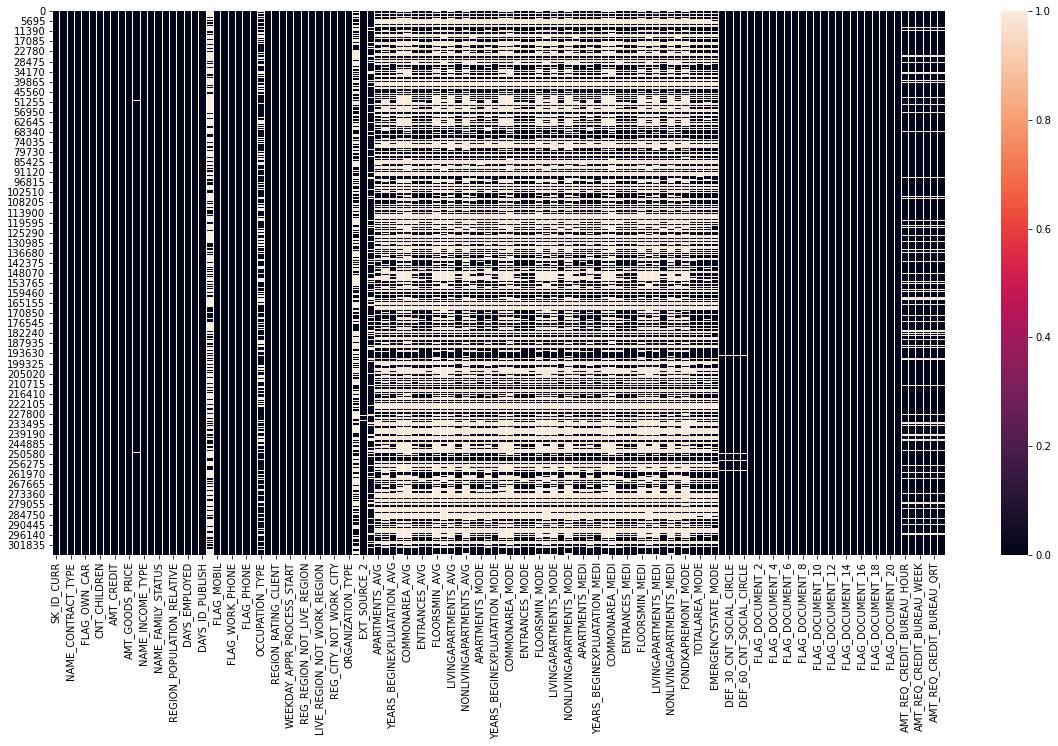

In [134]:
plt.figure(figsize=(20,10))
sns.heatmap(df.isna())

## valeur vide ou null 

In [188]:
(df.isna().sum()/df.shape[0]).sort_values()

SK_ID_CURR                      0.000000
HOUR_APPR_PROCESS_START         0.000000
REG_REGION_NOT_WORK_REGION      0.000000
LIVE_REGION_NOT_WORK_REGION     0.000000
REG_CITY_NOT_LIVE_CITY          0.000000
REG_CITY_NOT_WORK_CITY          0.000000
LIVE_CITY_NOT_WORK_CITY         0.000000
ORGANIZATION_TYPE               0.000000
FLAG_DOCUMENT_21                0.000000
FLAG_DOCUMENT_20                0.000000
FLAG_DOCUMENT_19                0.000000
FLAG_DOCUMENT_18                0.000000
FLAG_DOCUMENT_17                0.000000
FLAG_DOCUMENT_16                0.000000
FLAG_DOCUMENT_15                0.000000
FLAG_DOCUMENT_14                0.000000
FLAG_DOCUMENT_13                0.000000
FLAG_DOCUMENT_12                0.000000
FLAG_DOCUMENT_11                0.000000
FLAG_DOCUMENT_10                0.000000
FLAG_DOCUMENT_9                 0.000000
FLAG_DOCUMENT_8                 0.000000
FLAG_DOCUMENT_7                 0.000000
FLAG_DOCUMENT_6                 0.000000
FLAG_DOCUMENT_5 

In [136]:
#on suppr toutes les colonnes à plus de 90% de val manquante
df = df[df.columns[(df.isna().sum()/df.shape[0]) < 0.9]]

# Variables du csv

In [198]:
df.dtypes.value_counts()

float64    65
int64      41
int32      16
dtype: int64

<ipython-input-138-d7ff55bd56f5>:2: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  plt.figure()
<ipython-input-138-d7ff55bd56f5>:2: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  plt.figure()
<ipython-input-138-d7ff55bd56f5>:2: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  plt.figure()
<ipython-input-138-d7ff55bd56f5>:2: Runt

<ipython-input-138-d7ff55bd56f5>:2: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  plt.figure()
<ipython-input-138-d7ff55bd56f5>:2: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  plt.figure()
<ipython-input-138-d7ff55bd56f5>:2: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  plt.figure()
<ipython-input-138-d7ff55bd56f5>:2: Runt

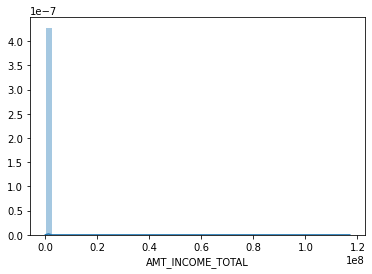

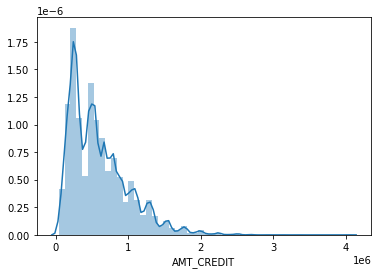

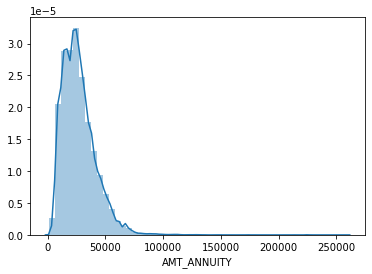

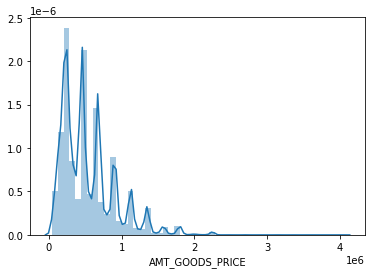

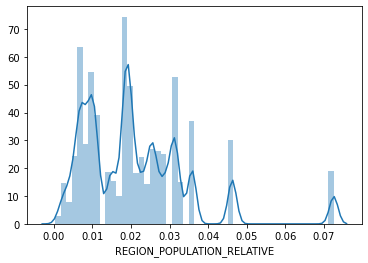

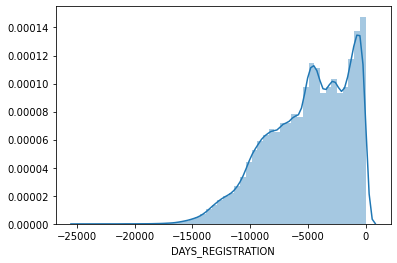

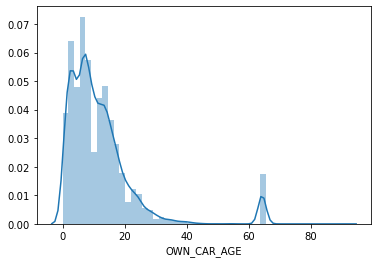

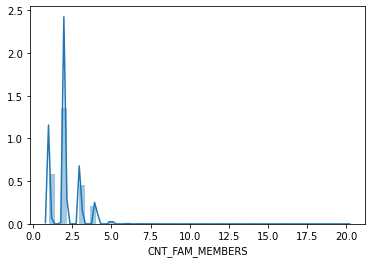

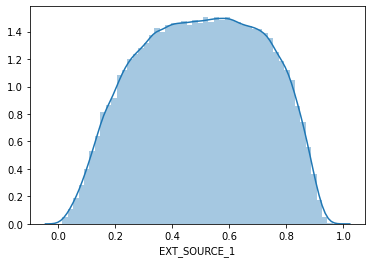

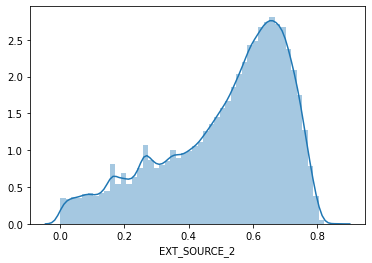

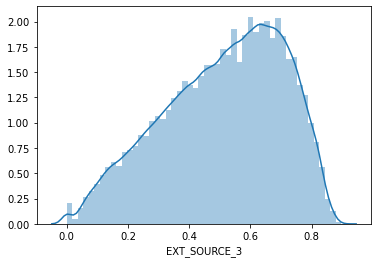

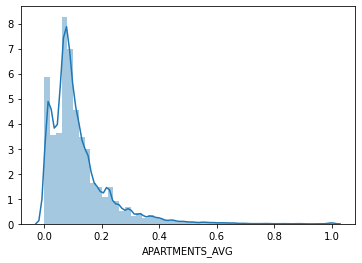

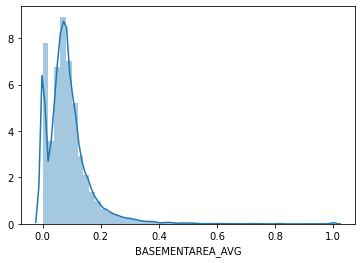

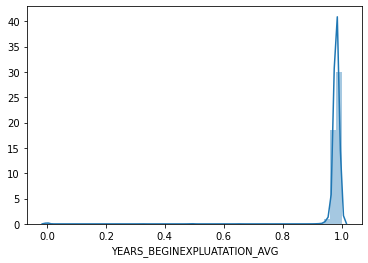

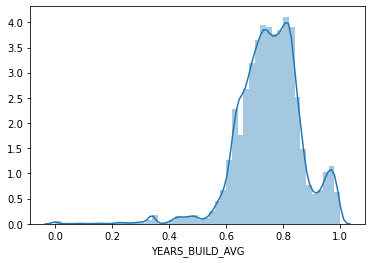

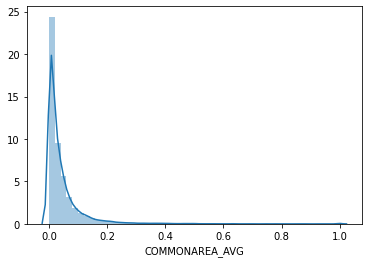

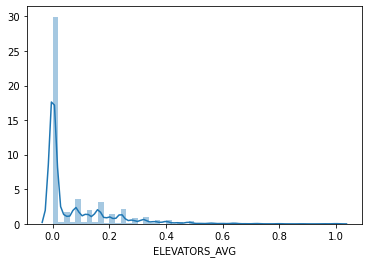

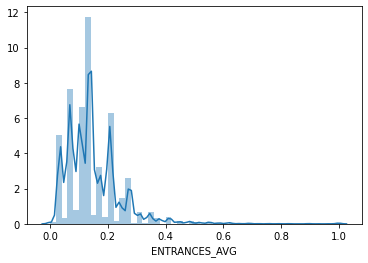

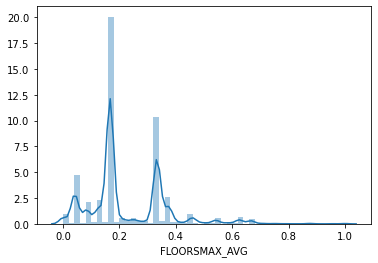

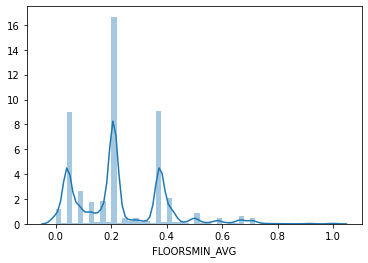

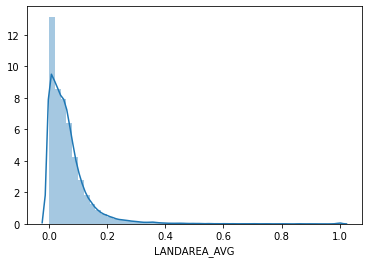

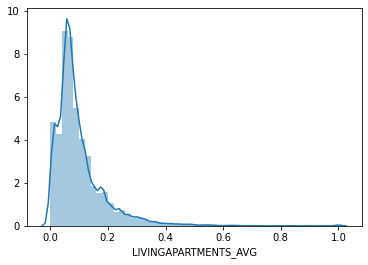

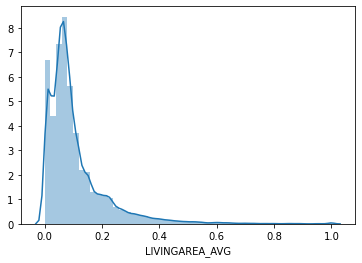

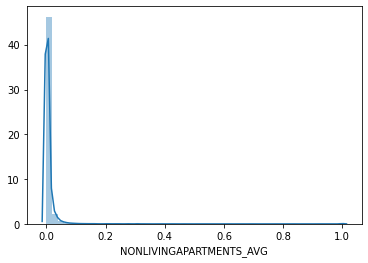

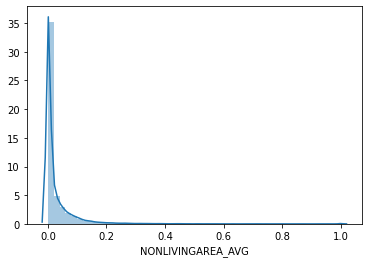

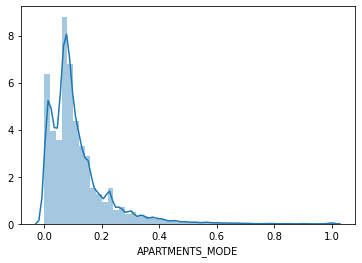

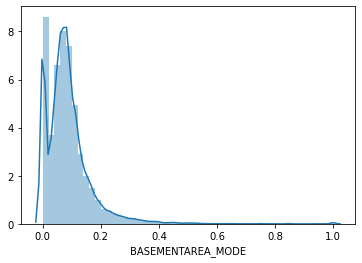

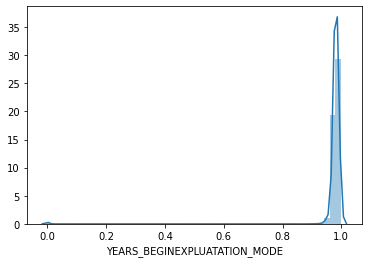

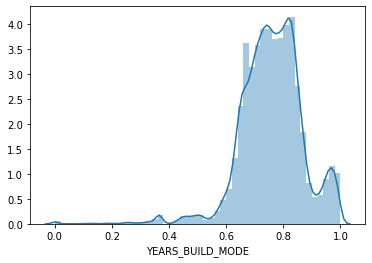

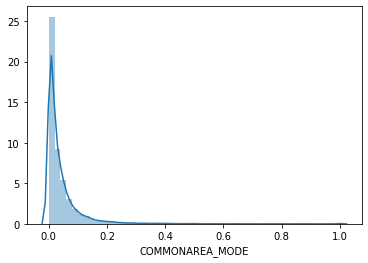

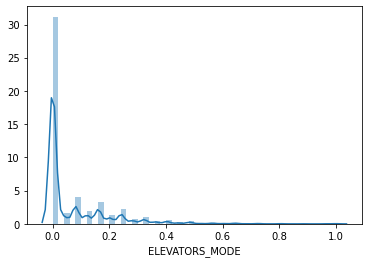

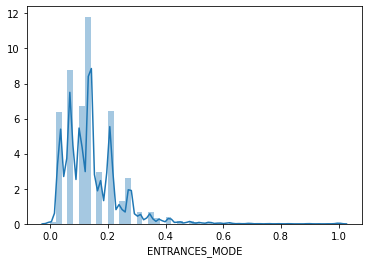

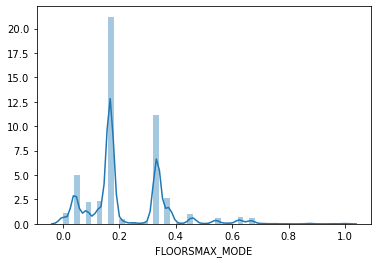

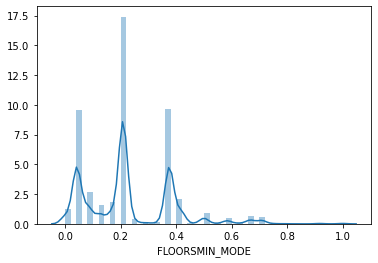

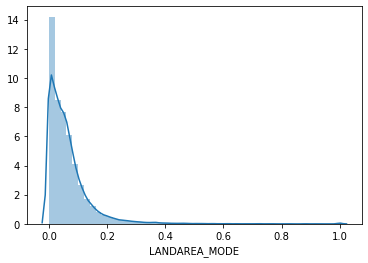

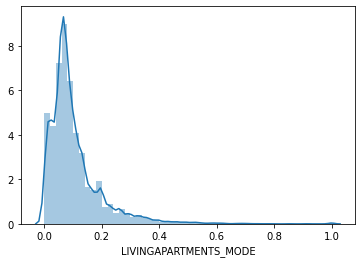

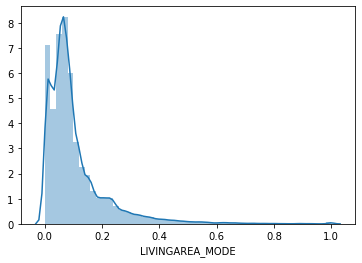

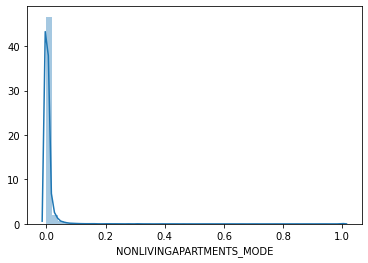

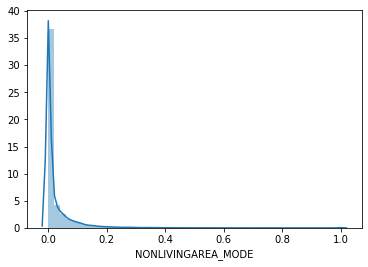

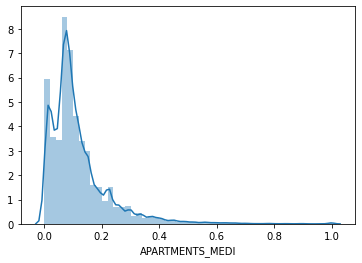

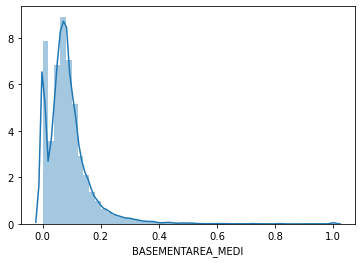

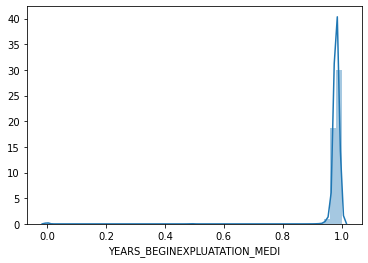

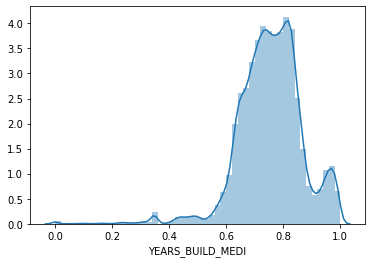

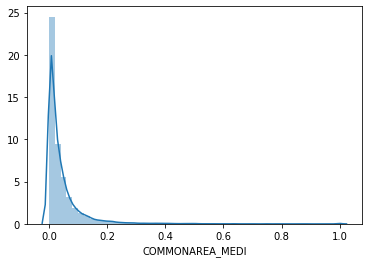

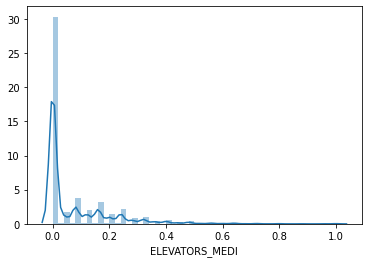

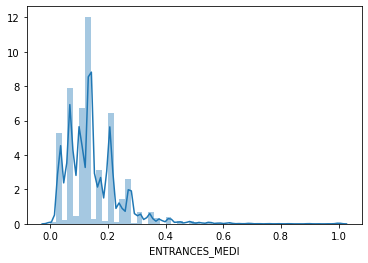

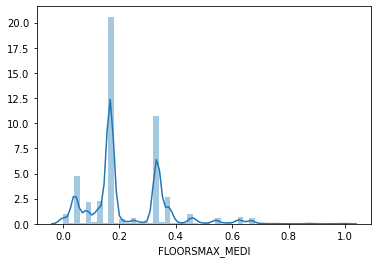

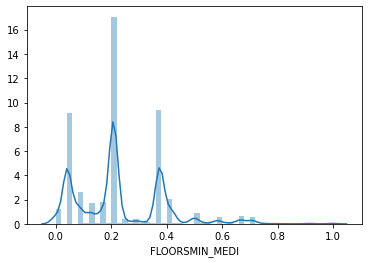

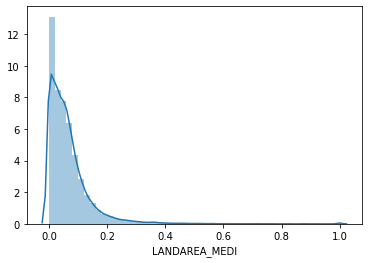

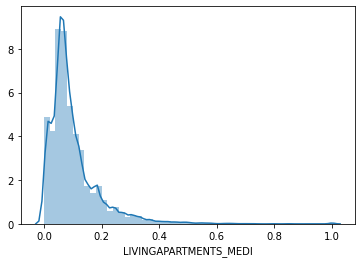

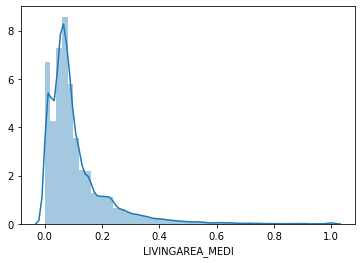

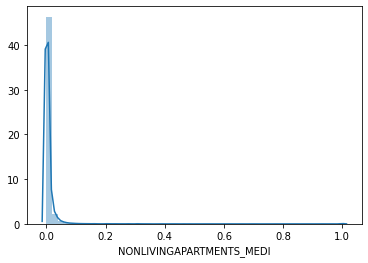

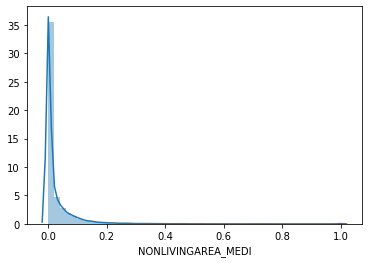

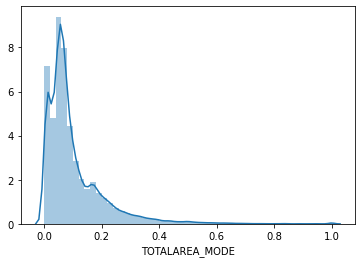

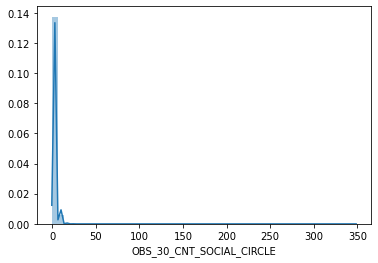

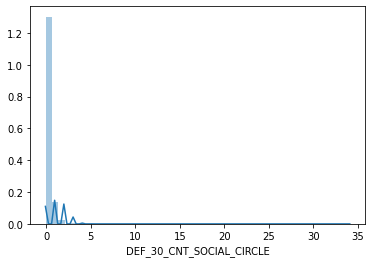

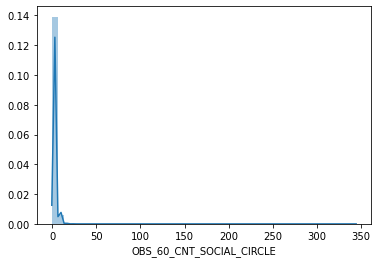

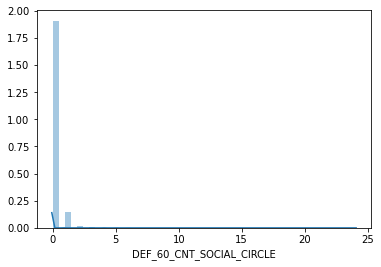

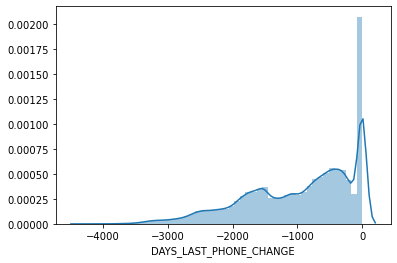

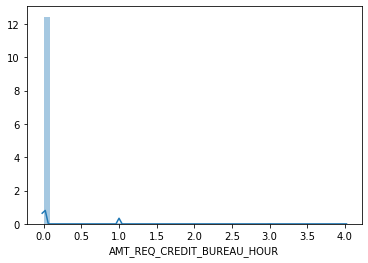

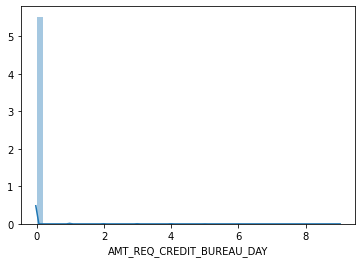

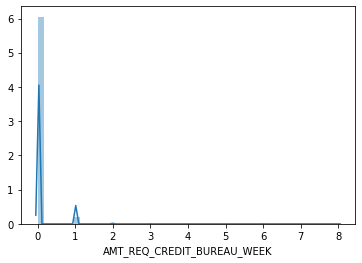

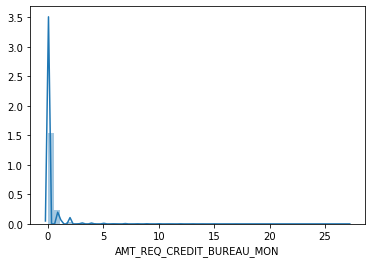

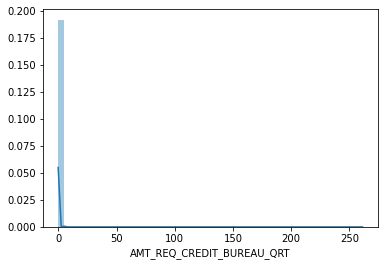

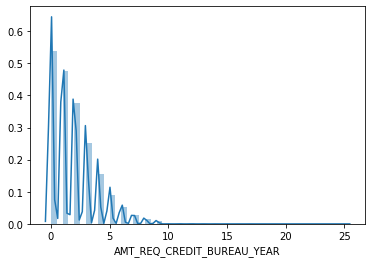

In [138]:
for col in df.select_dtypes('float'):
    plt.figure()
    sns.distplot(df[col])

NAME_CONTRACT_TYPE---------------------- => ['Cash loans' 'Revolving loans']
CODE_GENDER----------------------------- => ['M' 'F' 'XNA']
FLAG_OWN_CAR---------------------------- => ['N' 'Y']
FLAG_OWN_REALTY------------------------- => ['Y' 'N']
NAME_TYPE_SUITE------------------------- => ['Unaccompanied' 'Family' 'Spouse, partner' 'Children' 'Other_A' nan
 'Other_B' 'Group of people']
NAME_INCOME_TYPE------------------------ => ['Working' 'State servant' 'Commercial associate' 'Pensioner' 'Unemployed'
 'Student' 'Businessman' 'Maternity leave']
NAME_EDUCATION_TYPE--------------------- => ['Secondary / secondary special' 'Higher education' 'Incomplete higher'
 'Lower secondary' 'Academic degree']
NAME_FAMILY_STATUS---------------------- => ['Single / not married' 'Married' 'Civil marriage' 'Widow' 'Separated'
 'Unknown']
NAME_HOUSING_TYPE----------------------- => ['House / apartment' 'Rented apartment' 'With parents'
 'Municipal apartment' 'Office apartment' 'Co-op apartment']
OCCUPATI

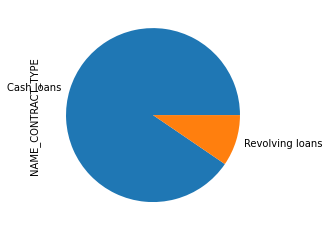

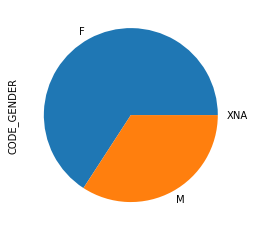

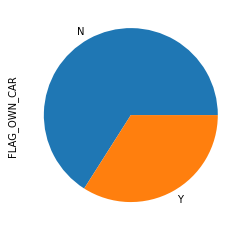

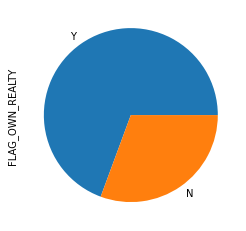

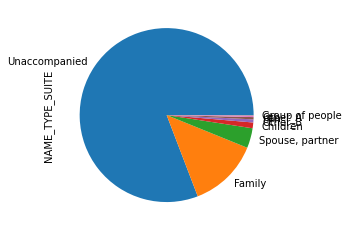

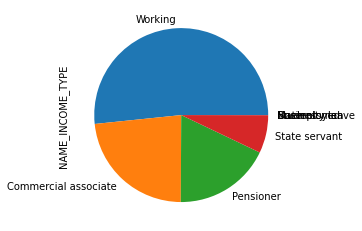

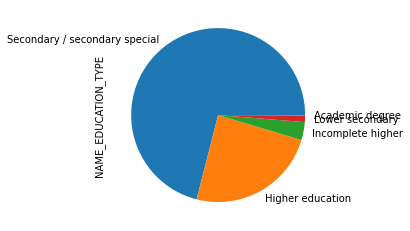

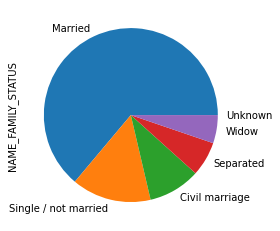

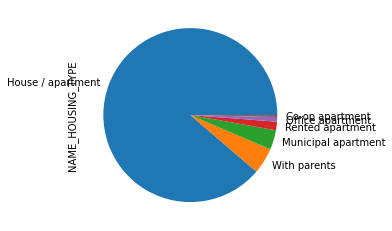

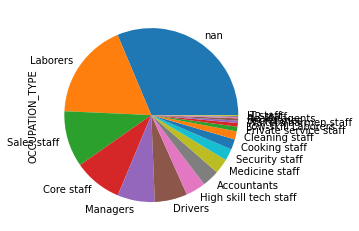

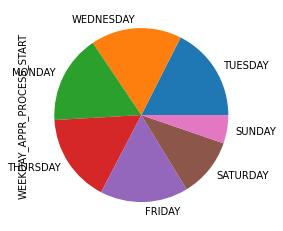

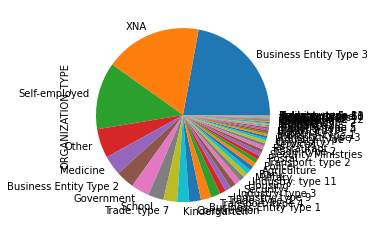

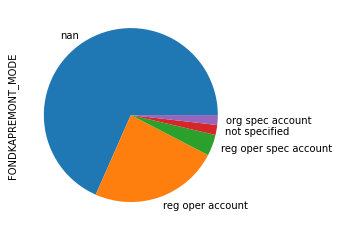

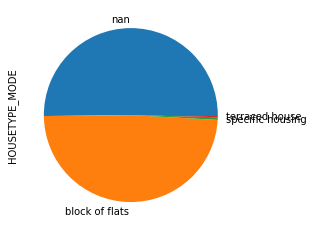

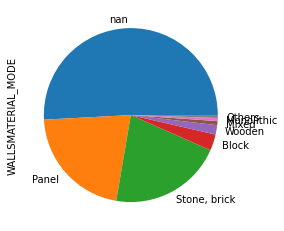

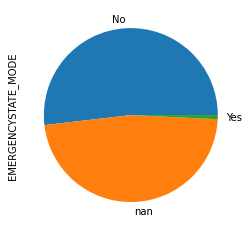

In [139]:
for col in df.select_dtypes('object'):
    print(f'{col :-<40} => {df[col].unique()}')
    plt.figure()
    df[col].value_counts(normalize=True, dropna=False).plot.pie()

# encoder des 16 colonnes objects

In [140]:
#df2 = pd.get_dummies(df)

In [197]:
le = []
for i,col in enumerate(df.select_dtypes('object').columns):
    try:
        le.append(LabelEncoder())
        df[col] = le[i].fit_transform(df[col].astype(str))
    except:
        print('error : '+col)
    

In [142]:
#le1 = LabelEncoder()
#le2 = LabelEncoder()

In [143]:
#df['EMERGENCYSTATE_MODE_1'] = df['EMERGENCYSTATE_MODE'].astype(str)

In [144]:
#le1.fit_transform(df['EMERGENCYSTATE_MODE_1'])

In [145]:
#le2.fit_transform(df['ORGANIZATION_TYPE'])

In [146]:
#le1.classes_

In [147]:
#le2.classes_

In [148]:
#df['EMERGENCYSTATE_MODE_1'] = le1.fit_transform(df['EMERGENCYSTATE_MODE_1'])
#df['ORGANIZATION_TYPE_1'] = le2.fit_transform(df['ORGANIZATION_TYPE'])

# difference entre positif et negatif

In [174]:
#df['TARGET']

In [207]:
df.dtypes.value_counts()

float64    65
int64      41
int32      16
dtype: int64

In [199]:
positif = df[df['TARGET'] == 1 ]
negatif = df[df['TARGET'] != 1 ]

In [202]:
df_int32_columns = df.select_dtypes('int32').columns
df_int64_columns = df.select_dtypes('int64').columns
df_float_columns = df.select_dtypes('float').columns

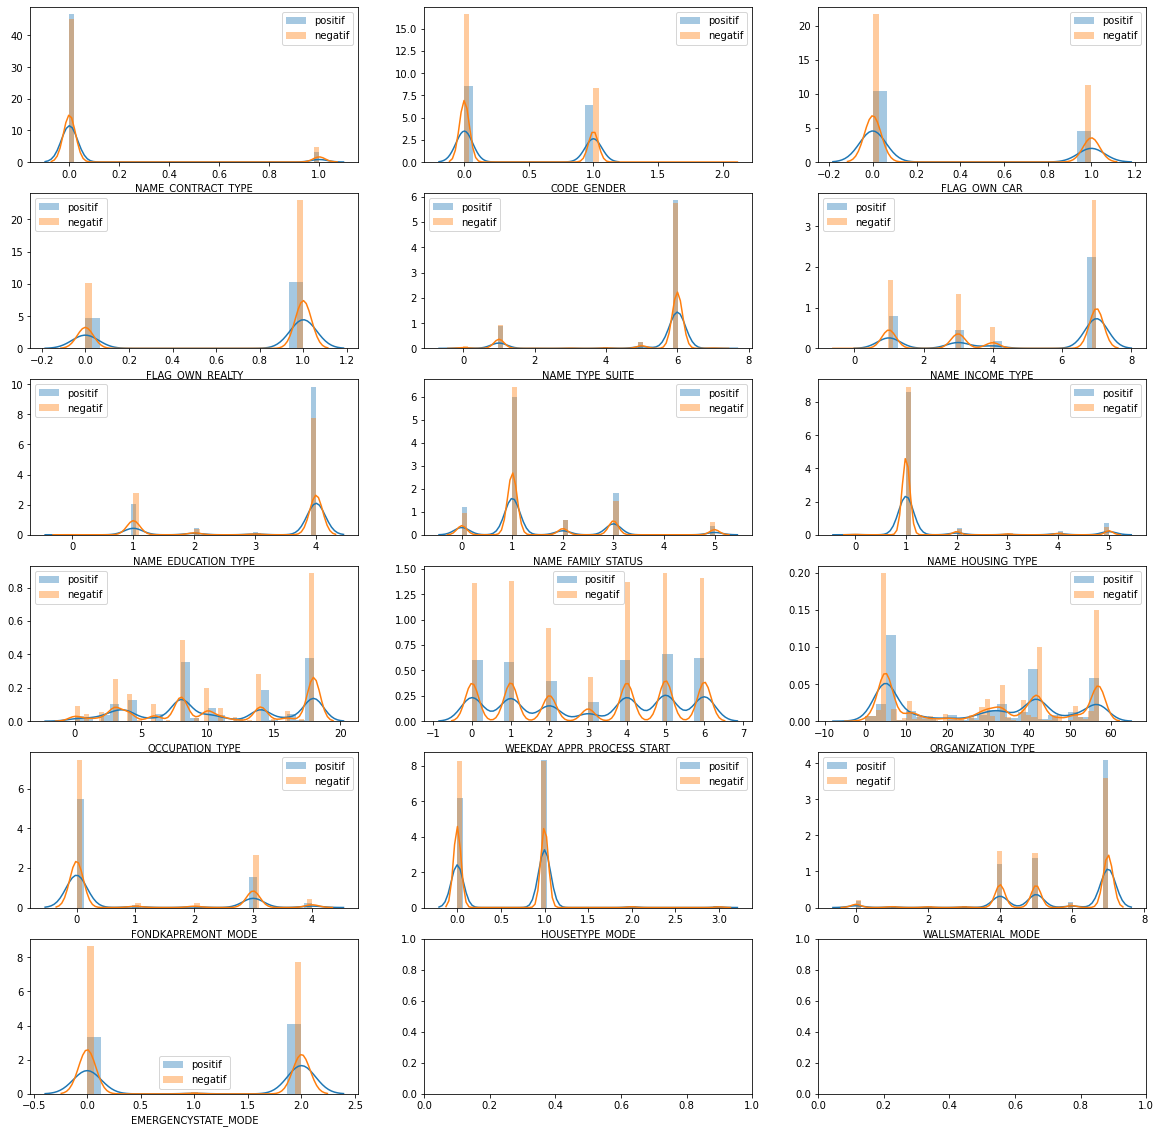

In [209]:
x=0
y=0
nbr = 3
fig, axs = plt.subplots(ceil(len(df_int32_columns)/nbr), nbr,  figsize=(20, 20))
for col in (df_int32_columns):
    if(x>=nbr):
        x=0
        y+=1
    sns.distplot(positif[col], label='positif', ax=axs[y,x])
    sns.distplot(negatif[col], label='negatif', ax=axs[y,x])
    axs[y,x].legend()
    x+=1

C:\Users\donovan\AppData\Local\Programs\Python\Python38\lib\site-packages\seaborn\distributions.py:283: UserWarning: Data must have variance to compute a kernel density estimate.
  warnings.warn(msg, UserWarning)
C:\Users\donovan\AppData\Local\Programs\Python\Python38\lib\site-packages\seaborn\distributions.py:283: UserWarning: Data must have variance to compute a kernel density estimate.
  warnings.warn(msg, UserWarning)
C:\Users\donovan\AppData\Local\Programs\Python\Python38\lib\site-packages\seaborn\distributions.py:283: UserWarning: Data must have variance to compute a kernel density estimate.
  warnings.warn(msg, UserWarning)
C:\Users\donovan\AppData\Local\Programs\Python\Python38\lib\site-packages\seaborn\distributions.py:283: UserWarning: Data must have variance to compute a kernel density estimate.
  warnings.warn(msg, UserWarning)
C:\Users\donovan\AppData\Local\Programs\Python\Python38\lib\site-packages\seaborn\distributions.py:283: UserWarning: Data must have variance to comp

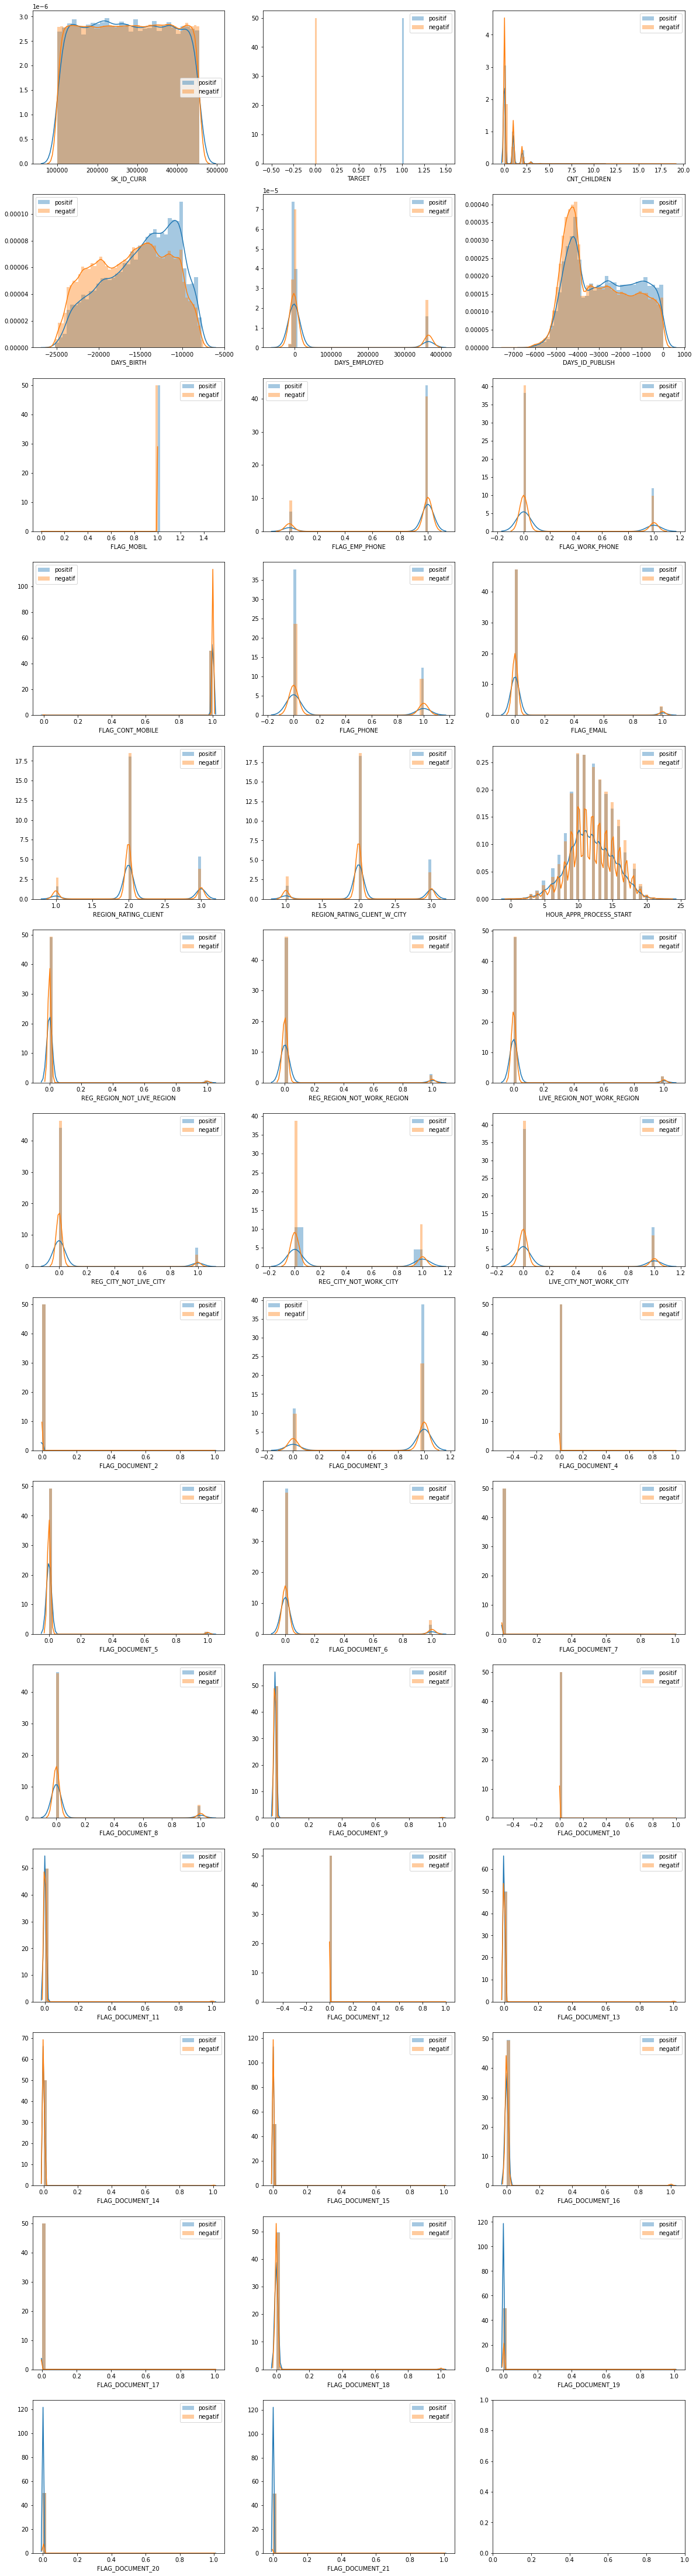

In [204]:
x=0
y=0
nbr = 3
fig, axs = plt.subplots(ceil(len(df_int64_columns)/nbr), nbr,  figsize=(20, 80))
for col in (df_int64_columns):
    if(x>=nbr):
        x=0
        y+=1
    sns.distplot(positif[col], label='positif', ax=axs[y,x])
    sns.distplot(negatif[col], label='negatif', ax=axs[y,x])
    axs[y,x].legend()
    x+=1

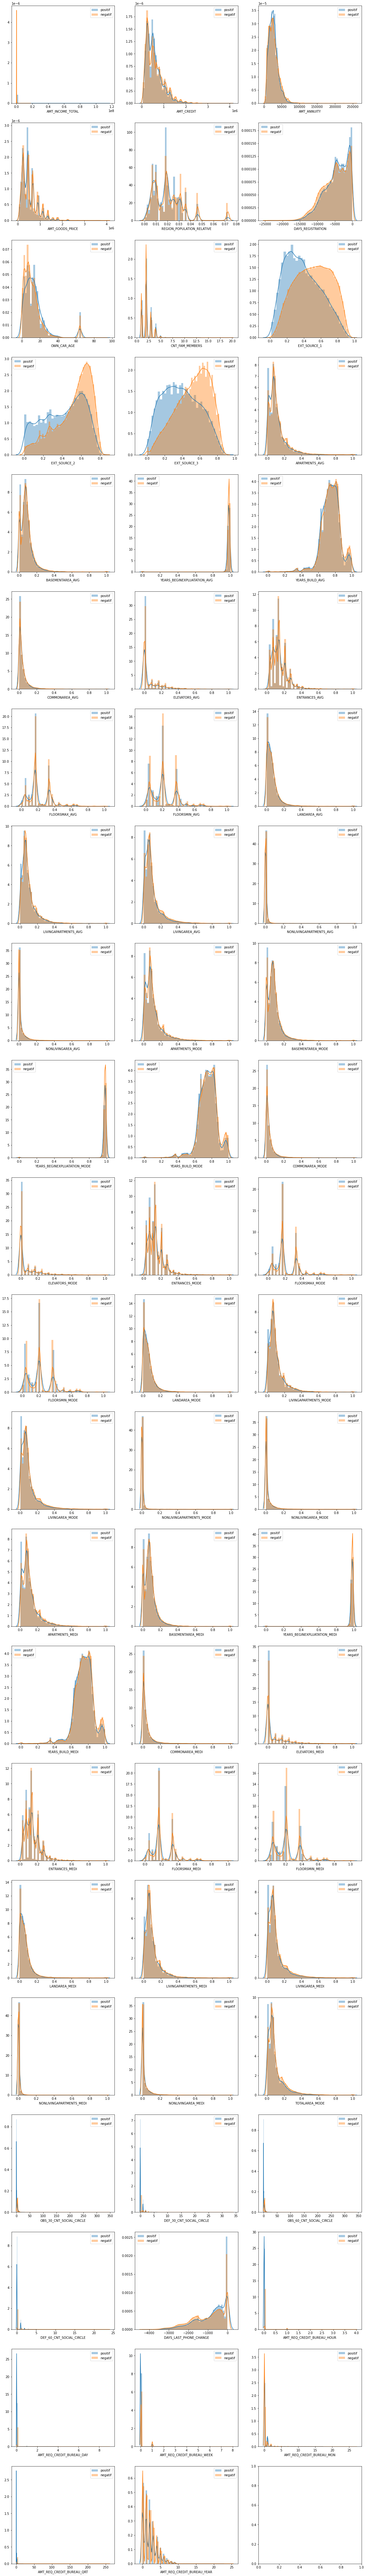

In [205]:
x=0
y=0
nbr = 3
fig, axs = plt.subplots(ceil(len(df_float_columns)/nbr), nbr,  figsize=(20, 120))
for col in (df_float_columns):
    if(x>=nbr):
        x=0
        y+=1
    sns.distplot(positif[col], label='positif', ax=axs[y,x])
    sns.distplot(negatif[col], label='negatif', ax=axs[y,x])
    axs[y,x].legend()
    x+=1

# nouveau dataTrain

In [223]:
data_train = df[['EMERGENCYSTATE_MODE','HOUSETYPE_MODE','OCCUPATION_TYPE','WEEKDAY_APPR_PROCESS_START','ORGANIZATION_TYPE','CODE_GENDER','FLAG_OWN_CAR','FLAG_OWN_REALTY','NAME_INCOME_TYPE','NAME_EDUCATION_TYPE','FONDKAPREMONT_MODE','DAYS_BIRTH','DAYS_ID_PUBLISH','FLAG_PHONE','REG_CITY_NOT_WORK_CITY','FLAG_DOCUMENT_3','AMT_CREDIT','AMT_GOODS_PRICE','REGION_POPULATION_RELATIVE','DAYS_REGISTRATION','OWN_CAR_AGE','EXT_SOURCE_1','EXT_SOURCE_2','EXT_SOURCE_3','OBS_60_CNT_SOCIAL_CIRCLE','DEF_30_CNT_SOCIAL_CIRCLE','OBS_30_CNT_SOCIAL_CIRCLE','DEF_60_CNT_SOCIAL_CIRCLE','AMT_REQ_CREDIT_BUREAU_HOUR','AMT_REQ_CREDIT_BUREAU_DAY','AMT_REQ_CREDIT_BUREAU_QRT']]
data_train.head()

,EMERGENCYSTATE_MODE,HOUSETYPE_MODE,OCCUPATION_TYPE,WEEKDAY_APPR_PROCESS_START,ORGANIZATION_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,FONDKAPREMONT_MODE,DAYS_BIRTH,DAYS_ID_PUBLISH,FLAG_PHONE,REG_CITY_NOT_WORK_CITY,FLAG_DOCUMENT_3,AMT_CREDIT,AMT_GOODS_PRICE,REGION_POPULATION_RELATIVE,DAYS_REGISTRATION,OWN_CAR_AGE,EXT_SOURCE_1,EXT_SOURCE_2,EXT_SOURCE_3,OBS_60_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,OBS_30_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_QRT
0,0,0,8,6,5,1,0,1,7,4,3,-9461,-2120,1,0,1,406597.5,351000.0,0.018801,-3648.0,NaN,0.083037,0.262949,0.139376,2.0,2.0,2.0,2.0,0.0,0.0,0.0
1,0,0,3,1,39,0,0,0,4,1,3,-16765,-291,1,0,1,1293502.5,1129500.0,0.003541,-1186.0,NaN,0.311267,0.622246,NaN,1.0,0.0,1.0,0.0,0.0,0.0,0.0
2,2,1,8,1,11,1,1,1,7,4,0,-19046,-2531,1,0,0,135000.0,135000.0,0.010032,-4260.0,26.0,NaN,0.555912,0.729567,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,2,1,8,6,5,0,0,1,7,4,0,-19005,-2437,0,0,1,312682.5,297000.0,0.008019,-9833.0,NaN,NaN,0.650442,NaN,2.0,0.0,2.0,0.0,NaN,NaN,NaN
4,2,1,3,4,37,1,0,1,7,4,0,-19932,-3458,0,1,0,513000.0,513000.0,0.028663,-4311.0,NaN,NaN,0.322738,NaN,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [224]:
(data_train.isna().sum()/data_train.shape[0]).sort_values()

EMERGENCYSTATE_MODE           0.000000
DAYS_REGISTRATION             0.000000
REGION_POPULATION_RELATIVE    0.000000
AMT_CREDIT                    0.000000
REG_CITY_NOT_WORK_CITY        0.000000
FLAG_PHONE                    0.000000
DAYS_ID_PUBLISH               0.000000
DAYS_BIRTH                    0.000000
FONDKAPREMONT_MODE            0.000000
FLAG_DOCUMENT_3               0.000000
NAME_INCOME_TYPE              0.000000
FLAG_OWN_REALTY               0.000000
FLAG_OWN_CAR                  0.000000
CODE_GENDER                   0.000000
ORGANIZATION_TYPE             0.000000
WEEKDAY_APPR_PROCESS_START    0.000000
OCCUPATION_TYPE               0.000000
HOUSETYPE_MODE                0.000000
NAME_EDUCATION_TYPE           0.000000
AMT_GOODS_PRICE               0.000904
EXT_SOURCE_2                  0.002146
DEF_60_CNT_SOCIAL_CIRCLE      0.003320
OBS_30_CNT_SOCIAL_CIRCLE      0.003320
OBS_60_CNT_SOCIAL_CIRCLE      0.003320
DEF_30_CNT_SOCIAL_CIRCLE      0.003320
AMT_REQ_CREDIT_BUREAU_HOU

# normalisation de la data

# autre

In [155]:
test = df.groupby(['TARGET'])
test

In [156]:
test.head()

,SK_ID_CURR,TARGET,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,OWN_CAR_AGE,FLAG_MOBIL,FLAG_EMP_PHONE,FLAG_WORK_PHONE,FLAG_CONT_MOBILE,FLAG_PHONE,FLAG_EMAIL,CNT_FAM_MEMBERS,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,HOUR_APPR_PROCESS_START,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,EXT_SOURCE_1,EXT_SOURCE_2,EXT_SOURCE_3,APARTMENTS_AVG,BASEMENTAREA_AVG,YEARS_BEGINEXPLUATATION_AVG,YEARS_BUILD_AVG,COMMONAREA_AVG,ELEVATORS_AVG,ENTRANCES_AVG,FLOORSMAX_AVG,FLOORSMIN_AVG,LANDAREA_AVG,LIVINGAPARTMENTS_AVG,LIVINGAREA_AVG,NONLIVINGAPARTMENTS_AVG,NONLIVINGAREA_AVG,APARTMENTS_MODE,BASEMENTAREA_MODE,YEARS_BEGINEXPLUATATION_MODE,YEARS_BUILD_MODE,COMMONAREA_MODE,ELEVATORS_MODE,ENTRANCES_MODE,FLOORSMAX_MODE,FLOORSMIN_MODE,LANDAREA_MODE,LIVINGAPARTMENTS_MODE,LIVINGAREA_MODE,NONLIVINGAPARTMENTS_MODE,NONLIVINGAREA_MODE,APARTMENTS_MEDI,BASEMENTAREA_MEDI,YEARS_BEGINEXPLUATATION_MEDI,YEARS_BUILD_MEDI,COMMONAREA_MEDI,ELEVATORS_MEDI,ENTRANCES_MEDI,FLOORSMAX_MEDI,FLOORSMIN_MEDI,LANDAREA_MEDI,LIVINGAPARTMENTS_MEDI,LIVINGAREA_MEDI,NONLIVINGAPARTMENTS_MEDI,NONLIVINGAREA_MEDI,TOTALAREA_MODE,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,DAYS_LAST_PHONE_CHANGE,FLAG_DOCUMENT_2,FLAG_DOCUMENT_3,FLAG_DOCUMENT_4,FLAG_DOCUMENT_5,FLAG_DOCUMENT_6,FLAG_DOCUMENT_7,FLAG_DOCUMENT_8,FLAG_DOCUMENT_9,FLAG_DOCUMENT_10,FLAG_DOCUMENT_11,FLAG_DOCUMENT_12,FLAG_DOCUMENT_13,FLAG_DOCUMENT_14,FLAG_DOCUMENT_15,FLAG_DOCUMENT_16,FLAG_DOCUMENT_17,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR,NAME_CONTRACT_TYPE_Cash loans,NAME_CONTRACT_TYPE_Revolving loans,CODE_GENDER_F,CODE_GENDER_M,CODE_GENDER_XNA,FLAG_OWN_CAR_N,FLAG_OWN_CAR_Y,FLAG_OWN_REALTY_N,FLAG_OWN_REALTY_Y,NAME_TYPE_SUITE_Children,NAME_TYPE_SUITE_Family,NAME_TYPE_SUITE_Group of people,NAME_TYPE_SUITE_Other_A,NAME_TYPE_SUITE_Other_B,"NAME_TYPE_SUITE_Spouse, partner",NAME_TYPE_SUITE_Unaccompanied,NAME_INCOME_TYPE_Businessman,NAME_INCOME_TYPE_Commercial associate,NAME_INCOME_TYPE_Maternity leave,NAME_INCOME_TYPE_Pensioner,NAME_INCOME_TYPE_State servant,NAME_INCOME_TYPE_Student,NAME_INCOME_TYPE_Unemployed,NAME_INCOME_TYPE_Working,NAME_EDUCATION_TYPE_Academic degree,NAME_EDUCATION_TYPE_Higher education,NAME_EDUCATION_TYPE_Incomplete higher,NAME_EDUCATION_TYPE_Lower secondary,NAME_EDUCATION_TYPE_Secondary / secondary special,NAME_FAMILY_STATUS_Civil marriage,NAME_FAMILY_STATUS_Married,NAME_FAMILY_STATUS_Separated,NAME_FAMILY_STATUS_Single / not married,NAME_FAMILY_STATUS_Unknown,NAME_FAMILY_STATUS_Widow,NAME_HOUSING_TYPE_Co-op apartment,NAME_HOUSING_TYPE_House / apartment,NAME_HOUSING_TYPE_Municipal apartment,NAME_HOUSING_TYPE_Office apartment,NAME_HOUSING_TYPE_Rented apartment,NAME_HOUSING_TYPE_With parents,OCCUPATION_TYPE_Accountants,OCCUPATION_TYPE_Cleaning staff,OCCUPATION_TYPE_Cooking staff,OCCUPATION_TYPE_Core staff,OCCUPATION_TYPE_Drivers,OCCUPATION_TYPE_HR staff,OCCUPATION_TYPE_High skill tech staff,OCCUPATION_TYPE_IT staff,OCCUPATION_TYPE_Laborers,OCCUPATION_TYPE_Low-skill Laborers,OCCUPATION_TYPE_Managers,OCCUPATION_TYPE_Medicine staff,OCCUPATION_TYPE_Private service staff,OCCUPATION_TYPE_Realty agents,OCCUPATION_TYPE_Sales staff,OCCUPATION_TYPE_Secretaries,OCCUPATION_TYPE_Security staff,OCCUPATION_TYPE_Waiters/barmen staff,WEEKDAY_APPR_PROCESS_START_FRIDAY,WEEKDAY_APPR_PROCESS_START_MONDAY,WEEKDAY_APPR_PROCESS_START_SATURDAY,WEEKDAY_APPR_PROCESS_START_SUNDAY,WEEKDAY_APPR_PROCESS_START_THURSDAY,WEEKDAY_APPR_PROCESS_START_TUESDAY,WEEKDAY_APPR_PROCESS_START_WEDNESDAY,ORGANIZATION_TYPE_Advertising,ORGANIZATION_TYPE_Agriculture,ORGANIZATION_TYPE_Bank,ORGANIZATION_TYPE_Business

In [168]:
#test['CODE_GENDER'].value_counts()

In [ ]:
test['FLAG_OWN_CAR'].value_counts()